Code for the algorithms and functions test are available in the following files:

In [276]:
include("../optimizers/linesearch.jl")
include("../utils/functions.jl")
using Gadfly

# Line Search algorithms

Now implement general line search algorithm of the form:

$$x_{k+1} = x_k + \alpha p_k,$$

where $\alpha$ is the step size and $p_k$ is the direction.

## Steepest descent

Here we just step in the direction of the gradient $p_k = -\nabla f(x_k)$.

## Newton's method

Here the step is $p_k = -\nabla^2 f(x_k)^{-1} \nabla f(x_k).$

If the Hessian $\nabla^2 f(x_k)^{-1}$ is not positive definite, we make a correction by adding a small multiple of the identity to the diagonal, trying small values until we get something sufficiently positive definite.

## Quasi-Newton methods

Here instead of computing the exact Hessian at each step, the Hessian is approximated and updated in each iteration.
Secant condition

### BFGS

Note: here we chose the 
The Armijo backtracking algorithm might result in step sizes with negative curvature. We can account for this by using a dampened BFGS algorithm.

## Inexact Newton methods and conjugate gradient

In Newton's method, we find the search direction $p_k$ by solving the linear system
$$\nabla^2 f_k p_k = -\nabla f_k.$$
Conjugate gradient methods can solve a large linear system inexpensively, and can be turned into a line search method.
We implement the Newton-CG method (aka truncated Newton method), in which we compute the search direction by applying the CG method to the above Newton equation and attempt to satisfy a termination test of the form
$$||r_k || \leq \eta_k ||\nabla f_k||,$$
where $r_k$ is the residual at step $k$ and $\eta_k \in (0,1)$.


# Testing the optimization methods 

## Fenton's function

In [255]:
@time xvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "newton", 1000);
@time svals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "steepest", 1000);
@time cvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "newton_CG", 1000);
@time qvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "BFGS", 1000);

Using method newton
Number of indefinite fixes 0
Number of iterations 7
  0.101786 seconds (65.48 k allocations: 3.111 MB)
Using method steepest
100
200
300
Number of indefinite fixes 0
Number of iterations 376
  0.019169 seconds (36.88 k allocations: 1.071 MB)
Using method newton_CG
Number of indefinite fixes 0
Number of iterations 10
  0.039889 seconds (12.91 k allocations: 561.931 KB)
Using method BFGS
Number of indefinite fixes 0
Number of iterations 13
  0.020361 seconds (6.13 k allocations: 274.841 KB)


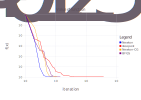

In [256]:
nsamps = length(xvals)
nsamps2 = length(svals)
nsamps3 = length(cvals)
nsamps4 = length(qvals)


fx = [fenton(xvals[i]) for i in 1:nsamps]
fx2 = [fenton(svals[i]) for i in 1:nsamps2]
fx3 = [fenton(cvals[i]) for i in 1:nsamps3]
fx4 = [fenton(qvals[i]) for i in 1:nsamps4]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=fx4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

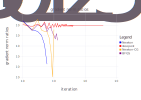

In [257]:
grads = [norm(fenton_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(fenton_g(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(fenton_g(cvals[i]), 2) for i in 1:nsamps3]
grads4 = [norm(fenton_g(qvals[i]), 2) for i in 1:nsamps4]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4-1, y=grads4[2:nsamps4,:]./grads4[1:nsamps4-1,:], Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

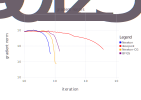

In [258]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=grads4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
    Scale.x_log10, Scale.y_log10)

## Rosenbrock function

The Rosenbrock function is defined by:
$$f(x) = \sum_{i=1}^n [ (1-x_{2i-1})^2 + 10(x_{2i} - x_{2i-1}^2)^2 ]$$


In [266]:
@time xvals = line_search(rosenbrock, ones(100)*3, rosenbrock_g, rosenbrock_h, "newton", 2000);
@time svals = line_search(rosenbrock, ones(100)*3, rosenbrock_g, rosenbrock_h, "steepest", 5000);
@time cvals = line_search(rosenbrock, ones(100)*3, rosenbrock_g, rosenbrock_h, "newton_CG", 2000);
@time qvals = line_search(rosenbrock, ones(100)*3, rosenbrock_g, rosenbrock_h, "BFGS", 2000);

Using method newton
Number of indefinite fixes 0
Number of iterations 12
  4.275025 seconds (49.74 M allocations: 767.234 MB, 19.62% gc time)
Using method steepest
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
Number of indefinite fixes 0
Number of iterations 2464
  8.272742 seconds (116.22 M allocations: 1.976 GB, 7.29% gc time)
Using method newton_CG
Number of indefinite fixes 0
Number of iterations 15
  4.320112 seconds (62.13 M allocations: 957.349 MB, 7.11% gc time)
Using method BFGS
Number of indefinite fixes 0
Number of iterations 41
  0.446302 seconds (6.61 M allocations: 135.811 MB, 7.08% gc time)


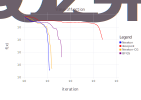

In [267]:
func = rosenbrock
func_g = rosenbrock_g

nsamps = length(xvals)
nsamps2 = length(svals)
nsamps3 = length(cvals)
nsamps4 = length(qvals)


fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]
fx3 = [func(cvals[i]) for i in 1:nsamps3]
fx4 = [func(qvals[i]) for i in 1:nsamps4]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=fx4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

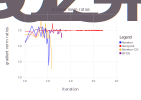

In [268]:
nsamps = length(xvals)

grads = [norm(func_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func_g(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(func_g(cvals[i]), 2) for i in 1:nsamps3]
grads4 = [norm(func_g(qvals[i]), 2) for i in 1:nsamps4]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4-1, y=grads4[2:nsamps4,:]./grads4[1:nsamps4-1,:], Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

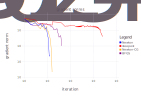

In [269]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=grads4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
    Scale.x_log10, Scale.y_log10)

## Cute function

The cute function is given by $f: \mathbb{R}^n \rightarrow \mathbb{R}$
$$ f(x) = \sum_{i=1}^{n-4} (-4x_i+3)^2 + (x_i^2 + 2x_{i+1}^2 + 3x_{i+2}^2 + 4 x_{i+3}^2 + 5x_n^2)^2 $$

In [277]:
@time xvals = line_search(cute, ones(100)*10, cute_g, cute_h, "newton", 2000);
@time svals = line_search(cute, ones(100)*10, cute_g, cute_h, "steepest", 2000);
@time cvals = line_search(cute, ones(100)*10, cute_g, cute_h, "newton_CG", 2000);
@time qvals = line_search(cute, ones(100)*10, cute_g, cute_h, "BFGS", 2000);

Using method newton
Number of indefinite fixes 15
Number of iterations 15
  0.355812 seconds (1.91 M allocations: 45.743 MB, 3.70% gc time)
Using method steepest
Number of indefinite fixes 0
Number of iterations 94
  0.043650 seconds (169.47 k allocations: 11.058 MB, 12.79% gc time)
Using method newton_CG
Number of indefinite fixes 14
Number of iterations 14
  0.255004 seconds (1.73 M allocations: 39.597 MB, 3.88% gc time)
Using method BFGS
Number of indefinite fixes 1
Number of iterations 28
  0.061596 seconds (177.52 k allocations: 27.001 MB, 5.10% gc time)


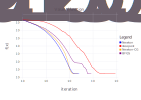

In [278]:
func = cute
func_g = cute_g

nsamps = length(xvals)
nsamps2 = length(svals)
nsamps3 = length(cvals)
nsamps4 = length(qvals)

fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]
fx3 = [func(cvals[i]) for i in 1:nsamps3]
fx4 = [func(qvals[i]) for i in 1:nsamps4]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=fx4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

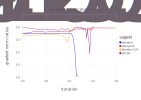

In [279]:
grads = [norm(func_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func_g(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(func(cvals[i]), 2) for i in 1:nsamps3]
grads4 = [norm(func_g(qvals[i]), 2) for i in 1:nsamps4]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4-1, y=grads4[2:nsamps4,:]./grads4[1:nsamps4-1,:], Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
Scale.x_log10, Scale.y_log10)

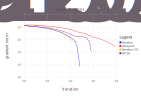

In [280]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
layer(x=1:nsamps4, y=grads4, Geom.line, Theme(default_color=color("purple"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG", "BFGS"], ["blue", "red", "orange", "purple"]),
    Scale.x_log10, Scale.y_log10)